In [1]:
# import libraries and modules

import torch

from setup import *

from rot_matrix import *

from rot_matrix_analysis import *

In [2]:
# Set the cuda device 

if torch.cuda.is_available():
    device = torch.device("cuda:0")
    torch.cuda.set_device(device)
else:
    device = torch.device("cpu")


# TEAPOT

In [3]:
teapot_path = "data/teapot.obj"
obj_name = teapot_path.split(".")[-2].split("/")[-1]
print("Loading", obj_name)
teapot_mesh = load_mesh(teapot_path, device=device, scale=1)
silhoutte_renderer, phong_renderer = get_renderers(image_size=256, device=device)

Loading teapot


/opt/anaconda3/envs/mr_env/lib/python3.8/site-packages/pytorch3d/io/obj_io.py:546: UserWarning: No mtl file provided
  warnings.warn("No mtl file provided")


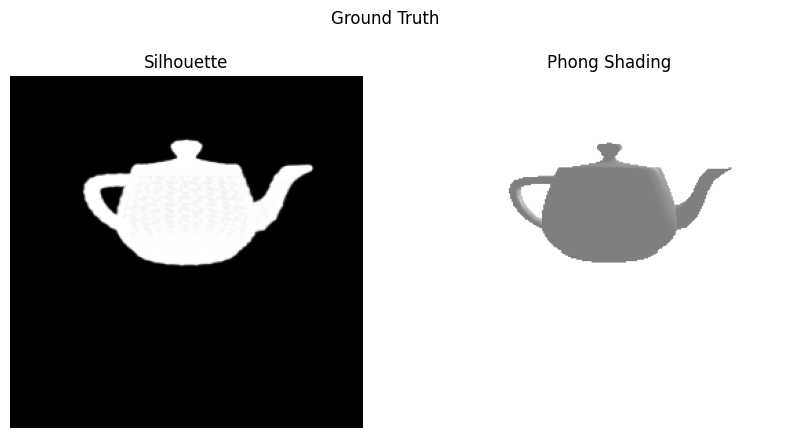

In [4]:
# Ground truth parameters

params = {
    "dist": 3,
    "elev": 15,
    "azim": 5
}

silhoutte_gt_teapot, phong_gt_teapot, R_gt, T_gt = get_ground_truth(teapot_mesh, silhoutte_renderer, phong_renderer, params, device)
plot_images(silhoutte_gt_teapot, phong_gt_teapot)

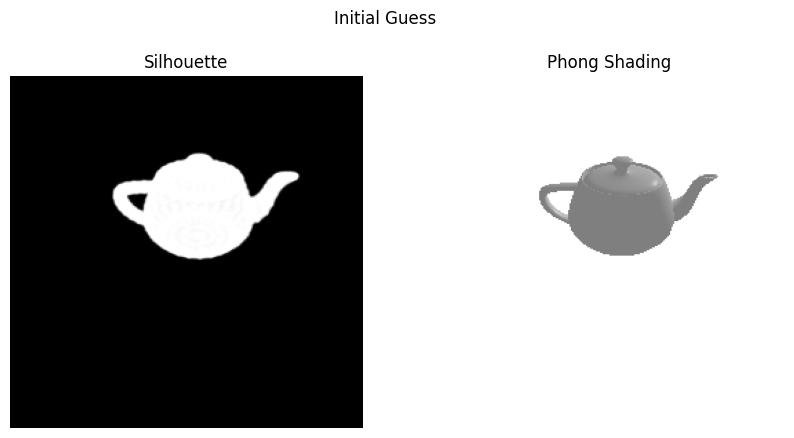

In [5]:
variances = {
    "dist": 1,
    "elev": 30,
    "azim": 30
}

# R_init, T_init = get_initial_R_T(params=params, variances=variances, deltaT=0.2, device=device)

# Read the initial guess from the file

R_init = torch.tensor(np.load("data/teapot_R_init_1.npy")).to(device)
T_init = torch.tensor(np.load("data/teapot_T_init_1.npy")).to(device)

plot_initial_guess(teapot_mesh, silhoutte_renderer, phong_renderer, R_init, T_init)

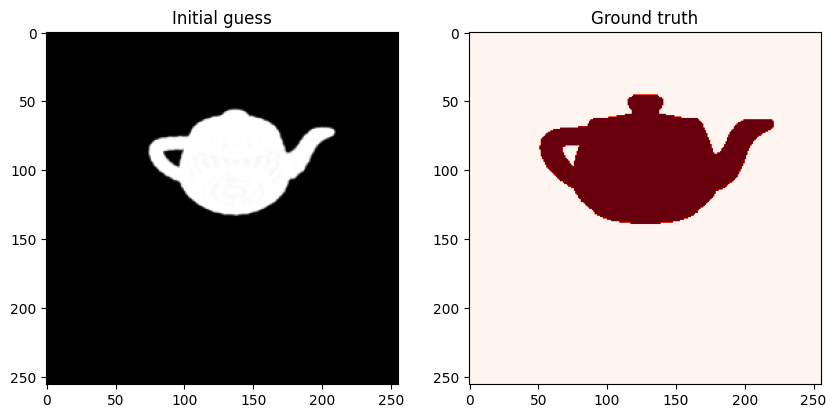

  0%|          | 0/50 [00:08<?, ?it/s]

iteration: 0, loss: 3509.25537109375


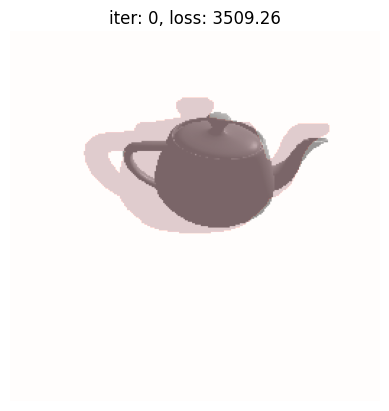

  4%|▍         | 2/50 [00:18<07:18,  9.13s/it]

iteration: 1, loss: 3273.338623046875


  6%|▌         | 3/50 [00:27<07:12,  9.20s/it]

iteration: 2, loss: 2647.471923828125


  8%|▊         | 4/50 [00:37<07:12,  9.40s/it]

iteration: 3, loss: 2406.56640625


 10%|█         | 5/50 [00:47<07:11,  9.59s/it]

iteration: 4, loss: 1879.9052734375


 12%|█▏        | 6/50 [00:58<07:31, 10.26s/it]

iteration: 5, loss: 1503.40966796875


 14%|█▍        | 7/50 [01:10<07:39, 10.68s/it]

iteration: 6, loss: 1630.89501953125


 16%|█▌        | 8/50 [01:21<07:40, 10.97s/it]

iteration: 7, loss: 1905.822265625


 18%|█▊        | 9/50 [01:33<07:38, 11.17s/it]

iteration: 8, loss: 1851.745361328125


 20%|██        | 10/50 [01:43<07:08, 10.72s/it]

iteration: 9, loss: 3152.228271484375


 20%|██        | 10/50 [01:53<07:08, 10.72s/it]

iteration: 10, loss: 2940.51025390625


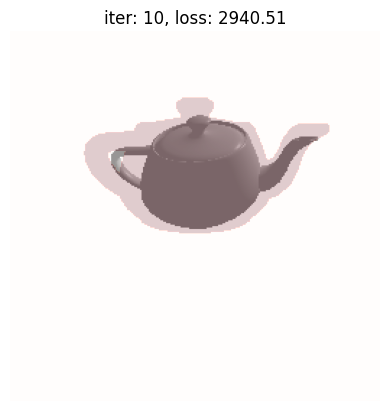

 24%|██▍       | 12/50 [02:03<06:39, 10.52s/it]

iteration: 11, loss: 2617.315185546875


 26%|██▌       | 13/50 [02:14<06:31, 10.58s/it]

iteration: 12, loss: 2294.161865234375


 28%|██▊       | 14/50 [02:25<06:26, 10.74s/it]

iteration: 13, loss: 2208.481689453125


 30%|███       | 15/50 [02:36<06:16, 10.76s/it]

iteration: 14, loss: 4749.9990234375


 32%|███▏      | 16/50 [02:47<06:10, 10.89s/it]

iteration: 15, loss: 4329.93359375


 34%|███▍      | 17/50 [02:58<06:00, 10.93s/it]

iteration: 16, loss: 3652.39794921875


 36%|███▌      | 18/50 [03:10<05:54, 11.09s/it]

iteration: 17, loss: 2803.5947265625


 38%|███▊      | 19/50 [03:22<05:56, 11.51s/it]

iteration: 18, loss: 1982.634765625


 40%|████      | 20/50 [03:36<06:03, 12.12s/it]

iteration: 19, loss: 1784.7501220703125


 40%|████      | 20/50 [03:49<06:03, 12.12s/it]

iteration: 20, loss: 2313.529052734375


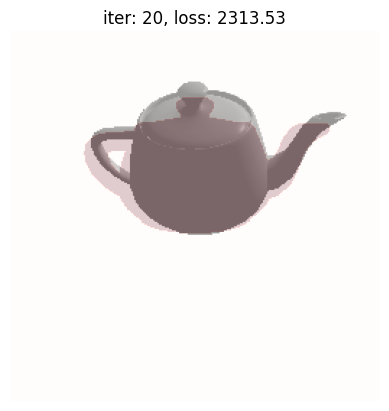

 44%|████▍     | 22/50 [04:03<05:57, 12.78s/it]

iteration: 21, loss: 2675.406005859375


 46%|████▌     | 23/50 [04:16<05:50, 12.98s/it]

iteration: 22, loss: 2565.557861328125


 48%|████▊     | 24/50 [04:30<05:41, 13.13s/it]

iteration: 23, loss: 2117.444580078125


 50%|█████     | 25/50 [04:43<05:32, 13.31s/it]

iteration: 24, loss: 1552.1685791015625


 52%|█████▏    | 26/50 [04:56<05:17, 13.23s/it]

iteration: 25, loss: 1268.83935546875


 54%|█████▍    | 27/50 [05:09<05:00, 13.08s/it]

iteration: 26, loss: 1384.6129150390625


 56%|█████▌    | 28/50 [05:21<04:42, 12.85s/it]

iteration: 27, loss: 1567.9478759765625


 58%|█████▊    | 29/50 [05:34<04:26, 12.71s/it]

iteration: 28, loss: 1773.8631591796875


 60%|██████    | 30/50 [05:46<04:13, 12.68s/it]

iteration: 29, loss: 1784.718505859375


 60%|██████    | 30/50 [05:58<04:13, 12.68s/it]

iteration: 30, loss: 2985.058837890625


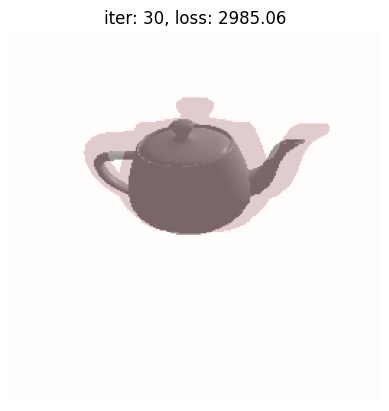

 64%|██████▍   | 32/50 [06:11<03:42, 12.38s/it]

iteration: 31, loss: 2601.015625


 66%|██████▌   | 33/50 [06:22<03:27, 12.19s/it]

iteration: 32, loss: 2105.13671875


 68%|██████▊   | 34/50 [06:35<03:17, 12.34s/it]

iteration: 33, loss: 1554.331298828125


 70%|███████   | 35/50 [06:48<03:08, 12.56s/it]

iteration: 34, loss: 1208.7423095703125


 72%|███████▏  | 36/50 [07:01<02:55, 12.57s/it]

iteration: 35, loss: 1219.878662109375


 74%|███████▍  | 37/50 [07:13<02:40, 12.35s/it]

iteration: 36, loss: 2122.5712890625


 76%|███████▌  | 38/50 [07:25<02:27, 12.31s/it]

iteration: 37, loss: 1669.0869140625


 78%|███████▊  | 39/50 [07:37<02:16, 12.43s/it]

iteration: 38, loss: 1431.86669921875


 80%|████████  | 40/50 [07:51<02:07, 12.72s/it]

iteration: 39, loss: 1314.8558349609375


 80%|████████  | 40/50 [08:04<02:07, 12.72s/it]

iteration: 40, loss: 1354.2852783203125


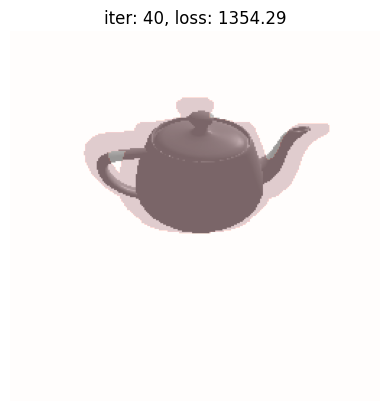

 84%|████████▍ | 42/50 [08:17<01:42, 12.77s/it]

iteration: 41, loss: 2084.41064453125


 86%|████████▌ | 43/50 [08:29<01:28, 12.68s/it]

iteration: 42, loss: 1908.9105224609375


 88%|████████▊ | 44/50 [08:42<01:16, 12.68s/it]

iteration: 43, loss: 1701.7120361328125


 90%|█████████ | 45/50 [08:55<01:03, 12.71s/it]

iteration: 44, loss: 1433.711669921875


 92%|█████████▏| 46/50 [09:07<00:50, 12.73s/it]

iteration: 45, loss: 1253.4417724609375


 94%|█████████▍| 47/50 [09:21<00:39, 13.05s/it]

iteration: 46, loss: 1422.079833984375


 96%|█████████▌| 48/50 [09:35<00:26, 13.15s/it]

iteration: 47, loss: 1700.17041015625


 98%|█████████▊| 49/50 [09:48<00:13, 13.31s/it]

iteration: 48, loss: 1639.853515625


100%|██████████| 50/50 [10:00<00:00, 12.01s/it]

iteration: 49, loss: 2324.572998046875


In [6]:
losses, parameter_updates, R_min, T_min = train_rotation_matrix_model(teapot_mesh, silhoutte_gt_teapot, R_init, T_init, silhoutte_renderer, phong_renderer, obj_name, 50, device)

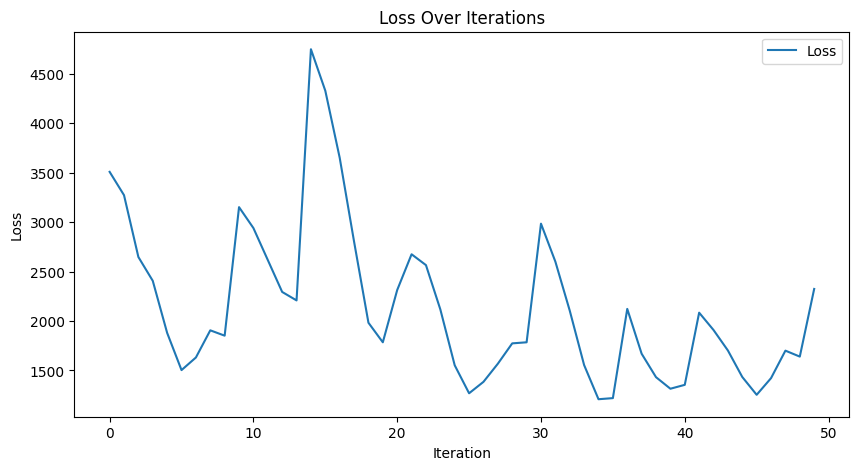

In [7]:
plot_losses(losses)

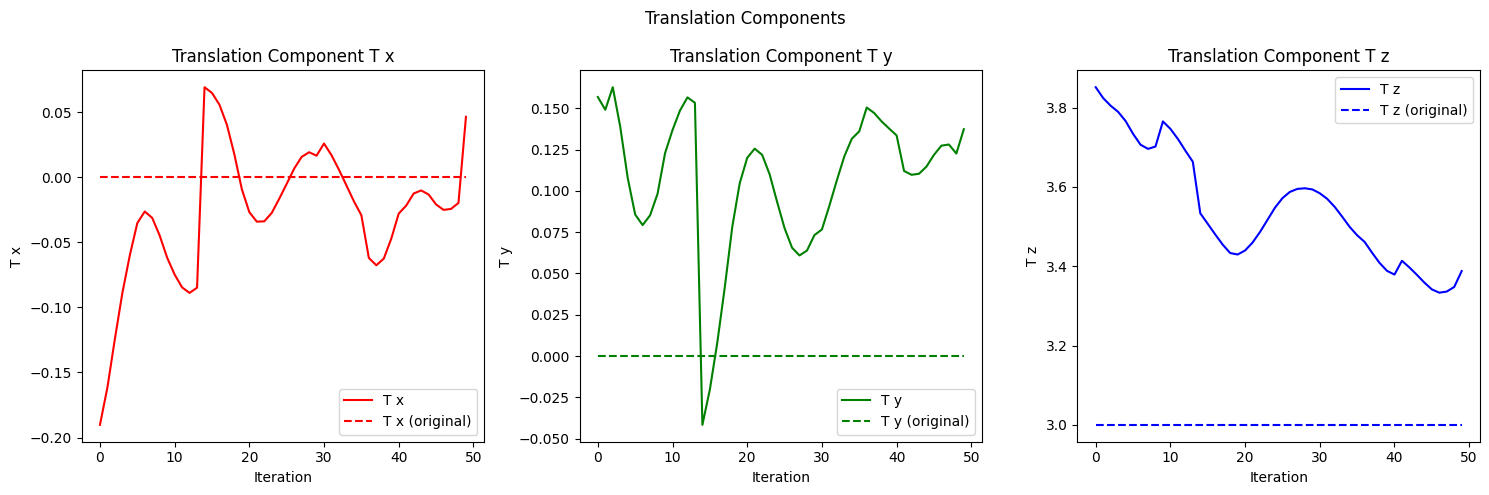

In [8]:
plot_translations(T_gt, parameter_updates)

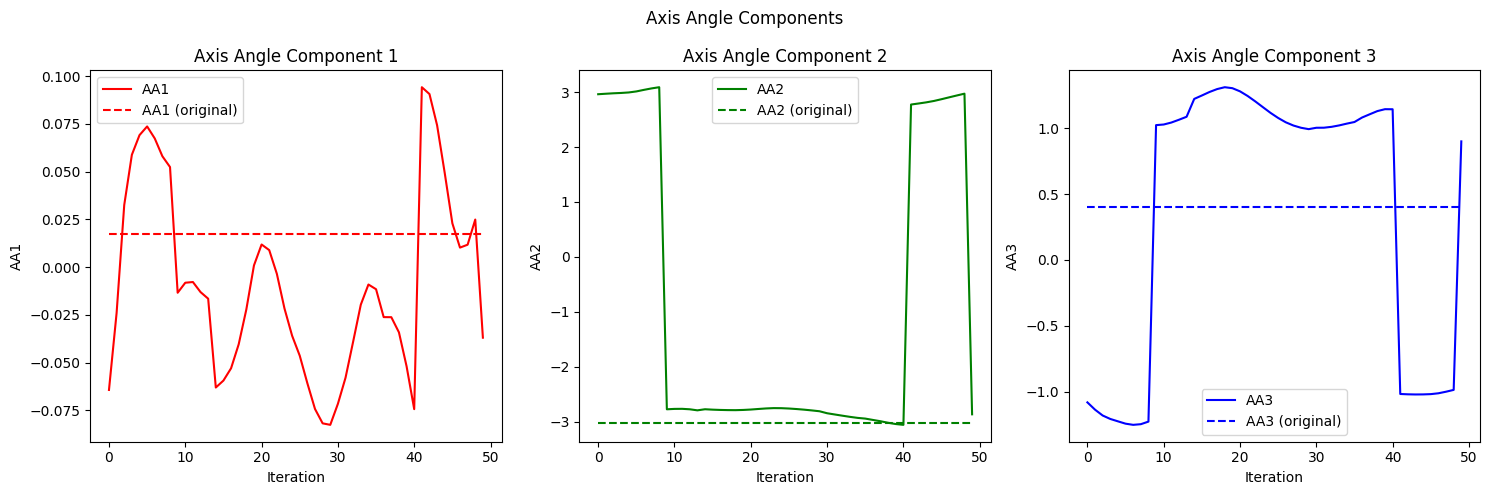

In [9]:
plot_axis_angles(R_gt, parameter_updates)